# **Task 01: NLP Analysis for Chat System Optimization**

In [1]:
# Important libraries to Install
!pip install transformers datasets scikit-learn pandas matplotlib seaborn nltk

In [2]:

from google.colab import files
uploaded = files.upload()


Saving intents.csv to intents.csv


## **1. Dataset Selection**

- **Source:** Kaggle
- **Filename:** `intents.csv`
- **Purpose:** Chatbot Intent Classification
- **Format:** CSV
- **Size:** 1,642 rows × 2 columns



#### **Description**: Contains user queries with labeled intents for training intent classification models in chatbots.


In [3]:
# Importing pandas to load dataset
import pandas as pd

# Load the CSV file
df = pd.read_csv("intents.csv")

# Display the first five rows of the dataset
display(df.head())

,messages,intent
0,What's the weather like today?,Negative
1,What's the price of gold today?,Negative
2,I want to book a flight ticket.,Negative
3,Can you tell me the current exchange rate?,Negative
4,How do I cook pho?,Negative


In [4]:
# Display the last five rows of the dataset
print(df.tail())

                                         messages        intent
1637        Enumerate your range of capabilities.  Ask Features
1638  Describe what kind of tasks you can handle.  Ask Features
1639           Detail the functions you excel in.  Ask Features
1640            Explain your range of assistance.  Ask Features
1641                   Describe what you can help  Ask Features


In [5]:
# Description of dataset
print(df.describe())

                           messages    intent
count                          1642      1642
unique                         1501         8
top     Hey, what’s going on today?  Negative
freq                              3       532


In [6]:
# Check for Null Values
print(df.isnull().sum())

messages    0
intent      0
dtype: int64


In [7]:
import re

# Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.strip()

df['messages'] = df['messages'].apply(clean_text)



In [8]:
# Label Encoding:
from sklearn.preprocessing import LabelEncoder
# Encode the 'intent' column into numeric labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['intent'])

# View the mapping from class names to labels
for i, class_name in enumerate(label_encoder.classes_):
    print(f"Label {i}: {class_name}")


Label 0: Ask Features
Label 1: Ask Name
Label 2: Bot Challenge
Label 3: Course Search
Label 4: Description
Label 5: Greet
Label 6: Negative
Label 7: Open Landing Page


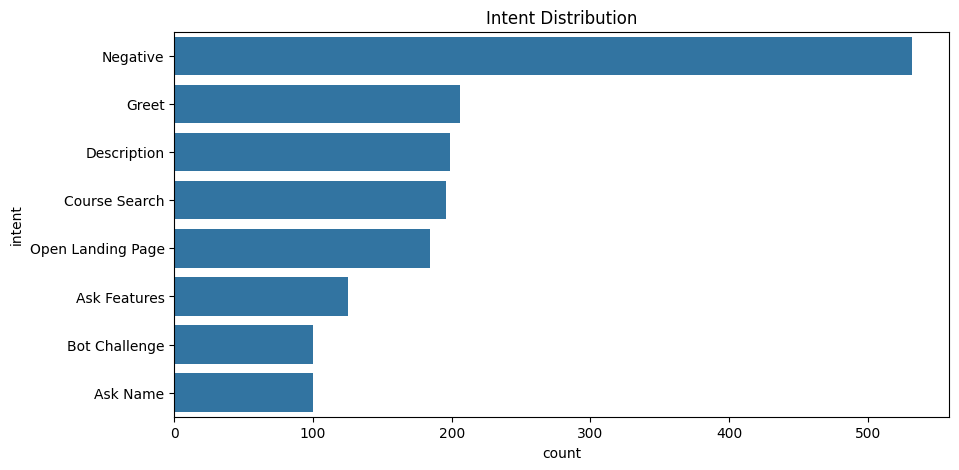

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(y='intent', data=df, order=df['intent'].value_counts().index)
plt.title("Intent Distribution")
plt.show()

In [10]:
# Basic structure and stats
print("🔎 Dataset Info:\n")
print(df.info())
print("\n📦 Dataset Sample:")
display(df.sample(5))
print("\n🧾 Class Distribution:")
print(df['intent'].value_counts())


🔎 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   messages  1642 non-null   object
 1   intent    1642 non-null   object
 2   label     1642 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 38.6+ KB
None

📦 Dataset Sample:


,messages,intent,label
1595,detail your range of assistance,Ask Features,0
230,can you recommend a good online course for coding,Negative,6
58,how do i join a live session,Negative,6
1064,display the course overview for innovation man...,Open Landing Page,7
1128,show me the landing page for retail operations...,Open Landing Page,7



🧾 Class Distribution:
intent
Negative             532
Greet                206
Description          199
Course Search        196
Open Landing Page    184
Ask Features         125
Bot Challenge        100
Ask Name             100
Name: count, dtype: int64


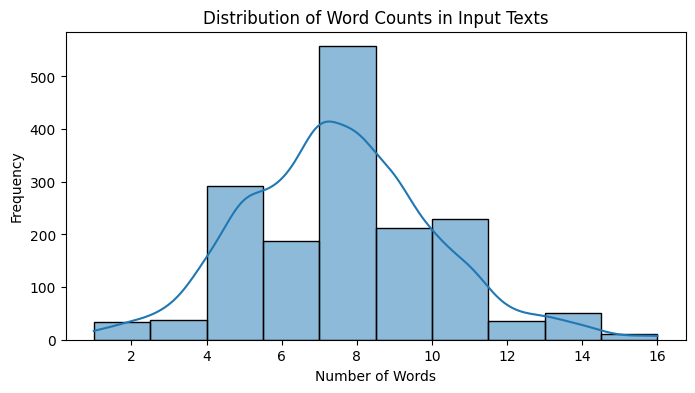

In [11]:
# Word Count per Text (Message)
df['word_count'] = df['messages'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
sns.histplot(df['word_count'], bins=10, kde=True)
plt.title("Distribution of Word Counts in Input Texts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

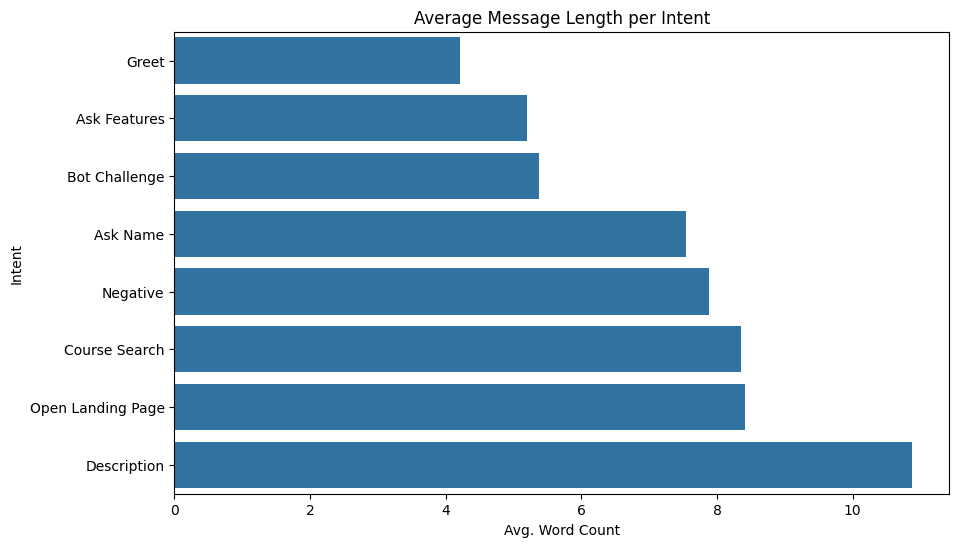

In [12]:
# Average Text Length by Intent
intent_lengths = df.groupby('intent')['word_count'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=intent_lengths.values, y=intent_lengths.index)
plt.title("Average Message Length per Intent")
plt.xlabel("Avg. Word Count")
plt.ylabel("Intent")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


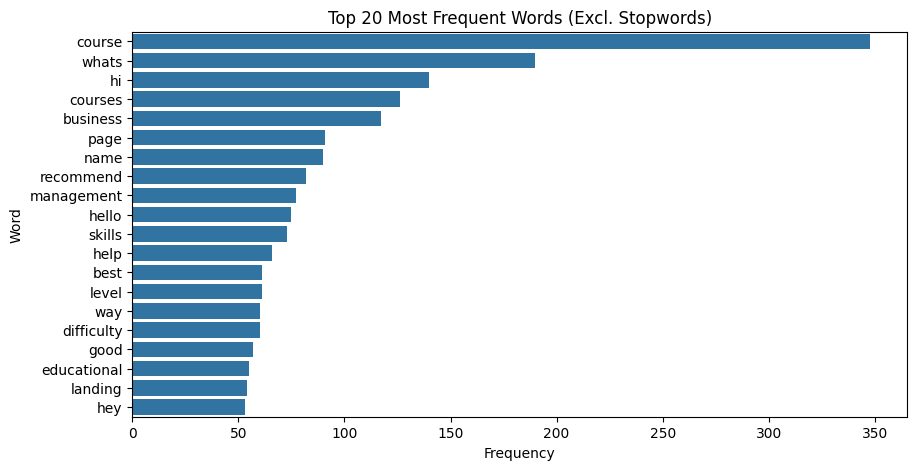

In [13]:
# Most Common Words (Global View)
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

all_words = ' '.join(df['messages']).lower().split()
filtered_words = [word for word in all_words if word not in stop_words]

common_words = Counter(filtered_words).most_common(20)

words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Most Frequent Words (Excl. Stopwords)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

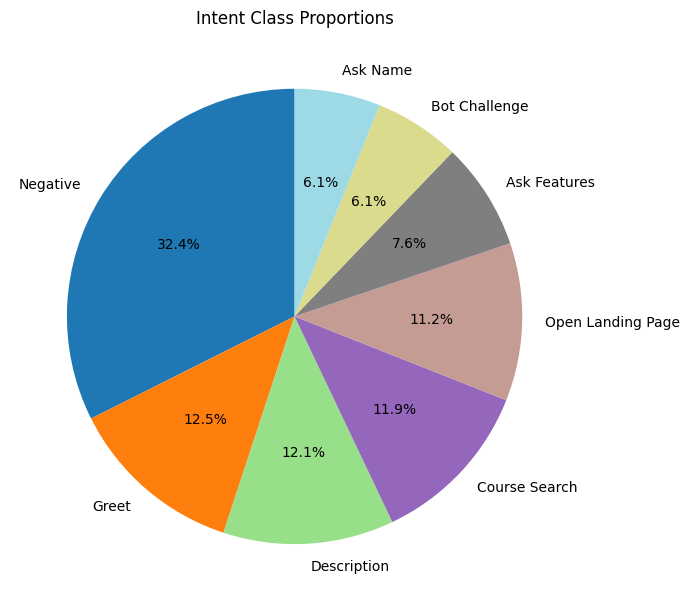

In [14]:
# Number of Samples per Intent (Pie Chart)
plt.figure(figsize=(7, 7))
df['intent'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colormap='tab20')
plt.title("Intent Class Proportions")
plt.ylabel("")
plt.tight_layout()
plt.show()


/tmp/ipython-input-15-2478157044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='intent', order=df['intent'].value_counts().index, palette='viridis')


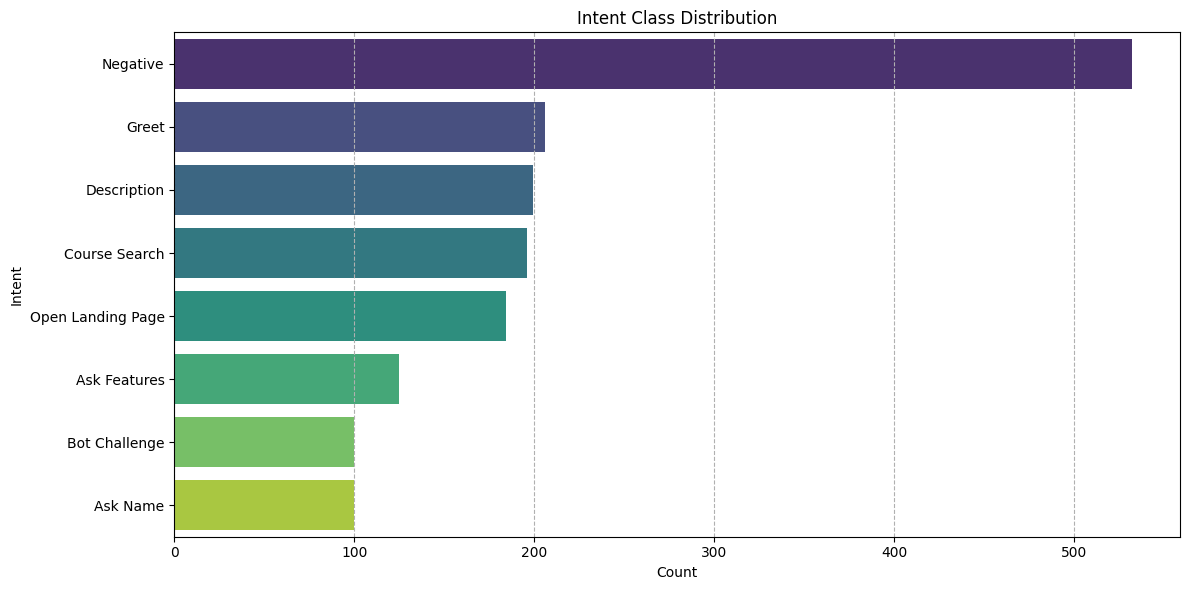

In [15]:
# Distribution of Unique Intents
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='intent', order=df['intent'].value_counts().index, palette='viridis')
plt.title("Intent Class Distribution")
plt.xlabel("Count")
plt.ylabel("Intent")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


In [16]:
# Train-Test Split
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['messages'], df['label'], test_size=0.2, random_state=42
)

In [17]:
# Tokenization & Dataset Prep
from transformers import BertTokenizer
from datasets import Dataset

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset = Dataset.from_dict({'text': test_texts.tolist(), 'label': test_labels.tolist()})

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize)
test_dataset = test_dataset.map(tokenize)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/1313 [00:00<?, ? examples/s]

Map:   0%|          | 0/329 [00:00<?, ? examples/s]

In [ ]:
# Model Training (BERT)
from transformers import BertForSequenceClassification, TrainingArguments, Trainer
import torch

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_encoder.classes_))

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch", # Changed from evaluation_strategy to eval_strategy
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir='./logs',
    save_strategy="no"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: aqsa-isha2002 (aqsa-isha2002-aptech-learning) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

# === Run Model Predictions ===
preds_output = trainer.predict(test_dataset)
y_preds = np.argmax(preds_output.predictions, axis=1)
y_true = test_labels

# Classification Report
print("📊 Classification Report:")
print(classification_report(y_true, y_preds, target_names=label_encoder.classes_))

# Accuracy & F1 Score
acc = accuracy_score(y_true, y_preds)
f1 = f1_score(y_true, y_preds, average='weighted')
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")




In [31]:
model.save_pretrained("bert-intent-model")
tokenizer.save_pretrained("bert-intent-model")


('bert-intent-model/tokenizer_config.json',
 'bert-intent-model/special_tokens_map.json',
 'bert-intent-model/vocab.txt',
 'bert-intent-model/added_tokens.json')

In [1]:
# Confusion Matrix Plot
cm = confusion_matrix(y_true, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45, cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Intent Classification")
plt.grid(False)
plt.tight_layout()
plt.show()

NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have your features and labels (X, y) and your model ready (e.g., clf)
# Example: clf = your_trained_model (e.g., Logistic Regression, SVM, etc.)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Accumulate confusion matrix across all folds
all_y_true = []
all_y_preds = []

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train your model (replace clf with your actual model)
    clf.fit(X_train, y_train)

    # Predict on validation set
    y_pred = clf.predict(X_val)

    # Store true labels and predictions
    all_y_true.extend(y_val)
    all_y_preds.extend(y_pred)

# Calculate confusion matrix for all folds combined
cm = confusion_matrix(all_y_true, all_y_preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45, cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Intent Classification")
plt.grid(False)
plt.tight_layout()
plt.show()


In [33]:
# Sample Predictions:
for i in range(5):
    print("Text:", test_texts.iloc[i])
    print("Actual:", label_encoder.inverse_transform([test_labels.iloc[i]])[0])
    print("Predicted:", label_encoder.inverse_transform([y_preds[i]])[0])
    print("---")


Text: search for courses in game theory
Actual: Course Search
Predicted: Course Search
---
Text: how difficult is the data science for public health course
Actual: Description
Predicted: Description
---
Text: are you a digital bot
Actual: Bot Challenge
Predicted: Bot Challenge
---
Text: are there any courses in child psychology
Actual: Course Search
Predicted: Course Search
---
Text: whats the difficulty level of the information technology cloud computing course
Actual: Description
Predicted: Description
---
